# 1) Load the houseprices data from Thinkful's database.

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [95]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table_name = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

# 2) Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [96]:
# Data Cleaning 1

In [97]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [98]:
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [99]:
house_prices_df[(house_prices_df["lotshape"].str.strip() == "--") | (house_prices_df["landcontour"].str.strip() == "--")]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [100]:
house_prices_df.nunique()

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
street              2
alley               2
lotshape            4
landcontour         4
utilities           2
lotconfig           5
landslope           3
neighborhood       25
condition1          9
condition2          8
bldgtype            5
housestyle          8
overallqual        10
overallcond         9
yearbuilt         112
yearremodadd       61
roofstyle           6
roofmatl            8
exterior1st        15
exterior2nd        16
masvnrtype          4
masvnrarea        327
exterqual           4
extercond           5
foundation          6
                 ... 
bedroomabvgr        8
kitchenabvgr        4
kitchenqual         4
totrmsabvgrd       12
functional          7
fireplaces          4
fireplacequ         5
garagetype          6
garageyrblt        97
garagefinish        3
garagecars          5
garagearea        441
garagequal          5
garagecond          5
paveddrive

In [101]:
def categorize_lot_area(lot_num):
    if lot_num >= 1000000000:
        return 1
    elif lot_num >= 100000000:
        return 2
    else:
        return 3

house_prices_df['lot_area_group'] = house_prices_df['lotarea'].apply(categorize_lot_area)

print(house_prices_df.groupby("lot_area_group")["lotarea"].count())

lot_area_group
3    1460
Name: lotarea, dtype: int64


In [102]:
# Data Cleaning 2

In [103]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [104]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

In [105]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [106]:
house_prices_df.isnull()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [107]:
for column_name in house_prices_df.columns:
    print("Unique values in column {} are: {}".format(column_name, house_prices_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

In [108]:
for column_name in ["lotarea", "lotfrontage"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in house_prices_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: lotarea
These are the problematic values for the variable: lotfrontage


In [109]:
house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["lotshape"] = house_prices_df["lotshape"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

In [110]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null float32
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non

In [111]:
house_prices_df.isnull()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [112]:
for column_name in house_prices_df.columns:
    print("Unique values in column {} are: {}".format(column_name, house_prices_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450.  9600. 11250. ... 17217. 13175.  9717.]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in c

In [113]:
for column_name in ["lotarea", "lotfrontage"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in house_prices_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: lotarea
These are the problematic values for the variable: lotfrontage


In [114]:
house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["lotshape"] = house_prices_df["lotshape"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotfrontage"] = pd.to_numeric(house_prices_df["lotfrontage"], downcast="float")

In [115]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float32
lotarea          1460 non-null float32
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non

In [116]:
house_prices_df.isnull()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [117]:
house_prices_df.isnull().sum()*100/house_prices_df.isnull().count()

id               0.000
mssubclass       0.000
mszoning         0.000
lotfrontage     17.740
lotarea          0.000
street           0.000
alley           93.767
lotshape         0.000
landcontour      0.000
utilities        0.000
lotconfig        0.000
landslope        0.000
neighborhood     0.000
condition1       0.000
condition2       0.000
bldgtype         0.000
housestyle       0.000
overallqual      0.000
overallcond      0.000
yearbuilt        0.000
yearremodadd     0.000
roofstyle        0.000
roofmatl         0.000
exterior1st      0.000
exterior2nd      0.000
masvnrtype       0.548
masvnrarea       0.548
exterqual        0.000
extercond        0.000
foundation       0.000
                 ...  
bedroomabvgr     0.000
kitchenabvgr     0.000
kitchenqual      0.000
totrmsabvgrd     0.000
functional       0.000
fireplaces       0.000
fireplacequ     47.260
garagetype       5.548
garageyrblt      5.548
garagefinish     5.548
garagecars       0.000
garagearea       0.000
garagequal 

In [118]:
house_prices_df.mssubclass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: mssubclass, dtype: int64

In [119]:
house_prices_df.mszoning = house_prices_df.mszoning.apply(str.strip).replace("", np.nan)

house_prices_df.mszoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [120]:
house_prices_df["lotarea"].fillna(house_prices_df["lotarea"].mean(), inplace=True)
house_prices_df["lotfrontage"].fillna(house_prices_df["lotfrontage"].mean(), inplace=True)

In [121]:
house_prices_df.isnull().sum()*100/house_prices_df.count()

id                  0.000
mssubclass          0.000
mszoning            0.000
lotfrontage         0.000
lotarea             0.000
street              0.000
alley            1504.396
lotshape            0.000
landcontour         0.000
utilities           0.000
lotconfig           0.000
landslope           0.000
neighborhood        0.000
condition1          0.000
condition2          0.000
bldgtype            0.000
housestyle          0.000
overallqual         0.000
overallcond         0.000
yearbuilt           0.000
yearremodadd        0.000
roofstyle           0.000
roofmatl            0.000
exterior1st         0.000
exterior2nd         0.000
masvnrtype          0.551
masvnrarea          0.551
exterqual           0.000
extercond           0.000
foundation          0.000
                   ...   
bedroomabvgr        0.000
kitchenabvgr        0.000
kitchenqual         0.000
totrmsabvgrd        0.000
functional          0.000
fireplaces          0.000
fireplacequ        89.610
garagetype  

In [122]:
mssubclass_list = house_prices_df.mssubclass

for i in range(0, len(house_prices_df.mssubclass)):
    if pd.isnull(house_prices_df.mssubclass[i]):
        house_prices_df.mssubclass[i] = house_prices_df.mssubclass[i-1]
        
house_prices_df["mssubclass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [123]:
# Data Cleaning 3

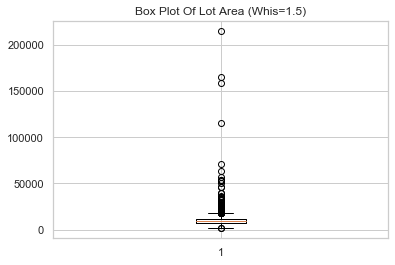

In [124]:
plt.boxplot(house_prices_df["lotarea"])
plt.title("Box Plot Of Lot Area (Whis=1.5)")
plt.show()

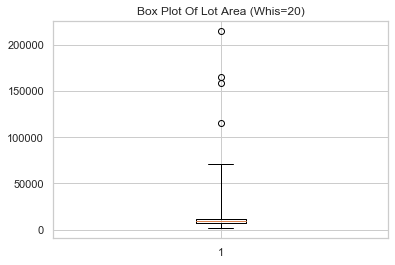

In [125]:
plt.boxplot(house_prices_df["lotarea"], whis=20)
plt.title("Box Plot Of Lot Area (Whis=20)")
plt.show()

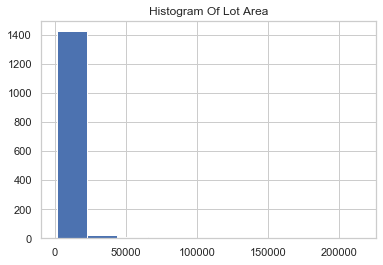

In [126]:
plt.hist(house_prices_df["lotarea"])
plt.title("Histogram Of Lot Area")
plt.show()

In [127]:
from scipy.stats import zscore

z_scores = zscore(house_prices_df["lotarea"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  53,  114,  121,  172,  186,  198,  250,  272,  314,  336,  385,
        412,  418,  423,  452,  458,  523,  529,  558,  563,  588,  661,
        664,  691,  692,  706,  726,  769,  807,  828,  848,  876,  934,
        939,  943, 1010, 1048, 1057, 1107, 1169, 1184, 1190, 1260, 1270,
       1287, 1298, 1346, 1383, 1396, 1409, 1430, 1446], dtype=int64),)
Number of outliers is: 52
The score threshold is: 2
The indices of the outliers:
(array([  53,  172,  250,  272,  314,  336,  385,  412,  452,  458,  523,
        529,  661,  706,  769,  848, 1169, 1184, 1190, 1287, 1298, 1396],
      dtype=int64),)
Number of outliers is: 22
The score threshold is: 3
The indices of the outliers:
(array([  53,  250,  314,  336,  385,  452,  458,  661,  706,  769,  848,
       1298, 1396], dtype=int64),)
Number of outliers is: 13
The score threshold is: 4
The indices of the outliers:
(array([ 250,  314,  336,  385,  452,  458,  706,  769, 1298

In [128]:
q75, q25 = np.percentile(house_prices_df["lotarea"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((house_prices_df["lotarea"] > max_val) 
                      | (house_prices_df["lotarea"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 184
The score threshold is: 1.5
Number of outliers is: 69
The score threshold is: 2.0
Number of outliers is: 54
The score threshold is: 2.5
Number of outliers is: 43
The score threshold is: 3.0
Number of outliers is: 34
The score threshold is: 3.5
Number of outliers is: 27
The score threshold is: 4.0
Number of outliers is: 24
The score threshold is: 4.5
Number of outliers is: 23


In [129]:
from scipy.stats.mstats import winsorize

winsorized_lot_area = winsorize(house_prices_df["lotarea"], (0, 0.10))

winsorized_lot_area

masked_array(data=[ 8450.,  9600., 11250., ...,  9042.,  9717.,  9937.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

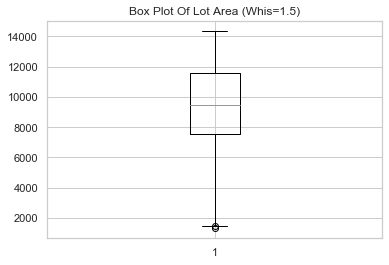

In [130]:
plt.boxplot(winsorized_lot_area)
plt.title("Box Plot Of Lot Area (Whis=1.5)")
plt.show()

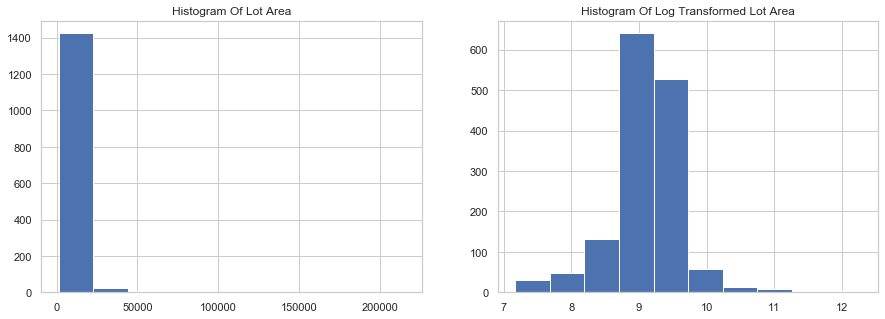

In [131]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(house_prices_df["lotarea"])
plt.title("Histogram Of Lot Area")

plt.subplot(1,2,2)
plt.hist(np.log(house_prices_df["lotarea"]))
plt.title("Histogram Of Log Transformed Lot Area")
plt.show()

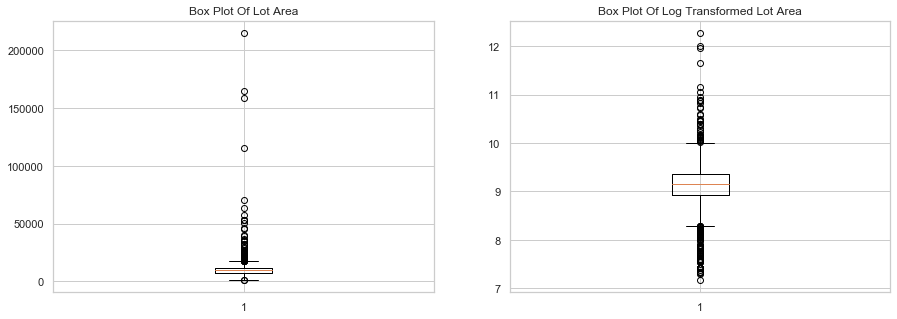

In [132]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(house_prices_df["lotarea"])
plt.title("Box Plot Of Lot Area")

plt.subplot(1,2,2)
plt.boxplot(np.log(house_prices_df["lotarea"]))
plt.title("Box Plot Of Log Transformed Lot Area")
plt.show()

In [133]:
q75, q25 = np.percentile(np.log(house_prices_df["lotarea"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(house_prices_df["lotarea"]) > max_val) 
                      | (np.log(house_prices_df["lotarea"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 204
The score threshold is: 1.5
Number of outliers is: 132
The score threshold is: 2.0
Number of outliers is: 96
The score threshold is: 2.5
Number of outliers is: 66
The score threshold is: 3.0
Number of outliers is: 40
The score threshold is: 3.5
Number of outliers is: 27
The score threshold is: 4.0
Number of outliers is: 6
The score threshold is: 4.5
Number of outliers is: 4


In [134]:
# Data Exploration

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotfrontage"] = pd.to_numeric(house_prices_df["lotfrontage"], downcast="float")

house_prices_df.lotshape = house_prices_df.lotshape.apply(str.strip).replace("", np.nan)

house_prices_df["lotarea"].fillna(house_prices_df["lotarea"].mean(), inplace=True)
house_prices_df["lotfrontage"].fillna(house_prices_df["lotfrontage"].mean(), inplace=True)

house_prices_df["winsorized_lot_area"] = winsorize(house_prices_df["lotarea"], (0, 0.10))
house_prices_df["winsorized_lot_frontage"] = winsorize(house_prices_df["lotfrontage"], (0, 0.10))
house_prices_df["winsorized_overall_qual"] = winsorize(house_prices_df["overallqual"], (0, 0.10))

for i in range(0, len(house_prices_df.mssubclass)):
    if pd.isnull(house_prices_df.mssubclass[i]):
        house_prices_df.mssubclass[i] = house_prices_df.mssubclass[i-1]

In [136]:
house_prices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,winsorized_lot_area,winsorized_lot_frontage,winsorized_overall_qual
count,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196,9417.278,67.978,6.045
std,421.610,42.301,22.024,9981.254,1.383,1.113,30.203,20.645,181.066,456.098,...,29.317,55.757,40.177,496.123,2.704,1.328,79442.503,3166.991,16.057,1.275
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000,1300.000,21.000,1.000
25%,365.750,20.000,60.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000,7553.500,60.000,5.000
50%,730.500,50.000,70.050,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000,9478.500,70.050,6.000
75%,1095.250,70.000,79.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000,11601.500,79.000,7.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000,14375.000,92.000,8.000


In [137]:
house_prices_df.describe(include=['O'])

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [138]:
house_prices_df.describe(include= 'all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,winsorized_lot_area,winsorized_lot_frontage,winsorized_overall_qual
count,1460.000,1460.000,1460,1460.000,1460.000,1460,91,1460,1460,1460,...,54,1460.000,1460.000,1460.000,1460,1460,1460.000,1460.000,1460.000,1460.000
unique,nan,nan,5,nan,nan,2,2,4,4,2,...,4,nan,nan,nan,9,6,nan,nan,nan,nan
top,nan,nan,RL,nan,nan,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,nan,nan,nan,WD,Normal,nan,nan,nan,nan
freq,nan,nan,1151,nan,nan,1454,50,925,1311,1459,...,49,nan,nan,nan,1267,1198,nan,nan,nan,nan
mean,730.500,56.897,NaN,70.050,10516.828,NaN,NaN,NaN,NaN,NaN,...,NaN,43.489,6.322,2007.816,NaN,NaN,180921.196,9417.278,67.978,6.045
std,421.610,42.301,NaN,22.024,9981.254,NaN,NaN,NaN,NaN,NaN,...,NaN,496.123,2.704,1.328,NaN,NaN,79442.503,3166.991,16.057,1.275
min,1.000,20.000,NaN,21.000,1300.000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,1.000,2006.000,NaN,NaN,34900.000,1300.000,21.000,1.000
25%,365.750,20.000,NaN,60.000,7553.500,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,5.000,2007.000,NaN,NaN,129975.000,7553.500,60.000,5.000
50%,730.500,50.000,NaN,70.050,9478.500,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,6.000,2008.000,NaN,NaN,163000.000,9478.500,70.050,6.000
75%,1095.250,70.000,NaN,79.000,11601.500,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,8.000,2009.000,NaN,NaN,214000.000,11601.500,79.000,7.000


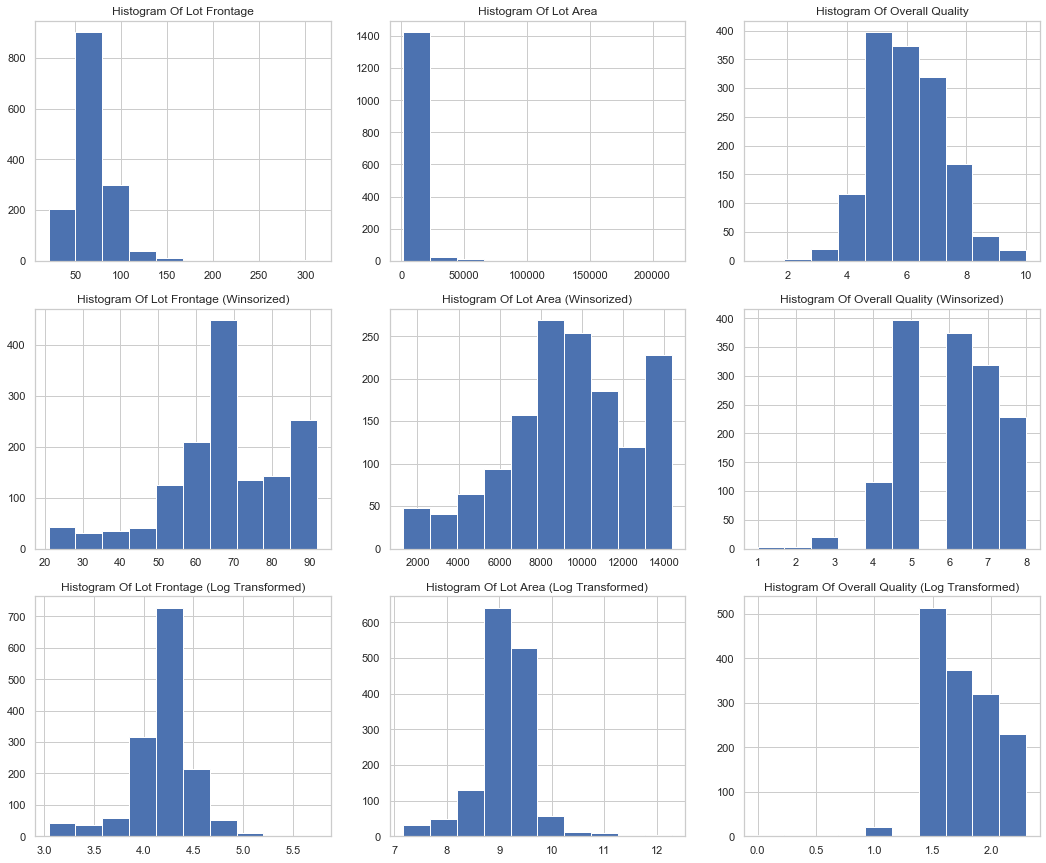

In [139]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(house_prices_df["lotfrontage"])
plt.title("Histogram Of Lot Frontage")

plt.subplot(3, 3, 2)
plt.hist(house_prices_df["lotarea"])
plt.title("Histogram Of Lot Area")

plt.subplot(3, 3, 3)
plt.hist(house_prices_df["overallqual"])
plt.title("Histogram Of Overall Quality")

plt.subplot(3, 3, 4)
plt.hist(house_prices_df["winsorized_lot_frontage"])
plt.title("Histogram Of Lot Frontage (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(house_prices_df["winsorized_lot_area"])
plt.title("Histogram Of Lot Area (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(house_prices_df["winsorized_overall_qual"])
plt.title("Histogram Of Overall Quality (Winsorized)")

plt.subplot(3, 3, 7)
plt.hist(np.log(house_prices_df["lotfrontage"]))
plt.title("Histogram Of Lot Frontage (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(house_prices_df["lotarea"]))
plt.title("Histogram Of Lot Area (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(house_prices_df["overallqual"]))
plt.title("Histogram Of Overall Quality (Log Transformed)")

plt.show()

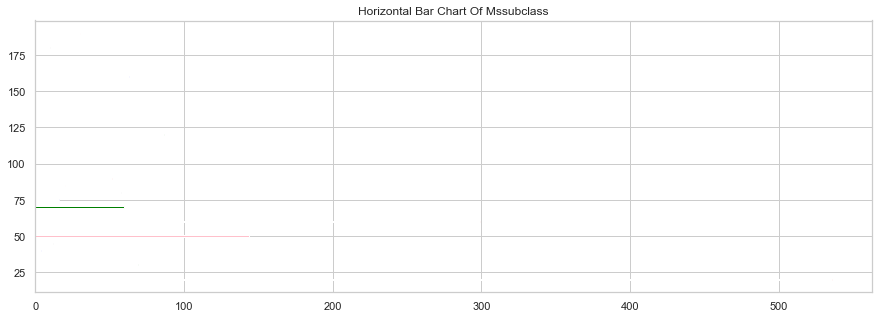

In [140]:
plt.figure(figsize=(15,5))
plt.barh(house_prices_df.groupby("mssubclass")["mssubclass"].count().index, 
        house_prices_df.groupby("mssubclass")["mssubclass"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Horizontal Bar Chart Of Mssubclass")

plt.show()

In [141]:
# Data Exploration 2

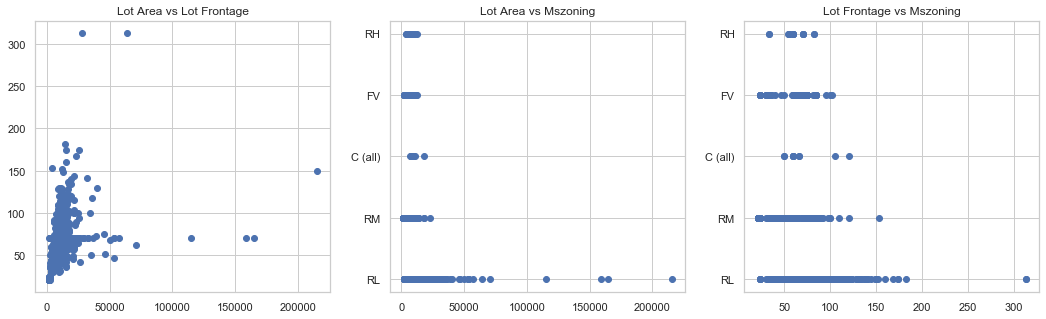

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotfrontage"] = pd.to_numeric(house_prices_df["lotfrontage"], downcast="float")

house_prices_df.lotshape = house_prices_df.lotshape.apply(str.strip).replace("", np.nan)


house_prices_df["lotarea"].fillna(house_prices_df["lotarea"].mean(), inplace=True)
house_prices_df["lotfrontage"].fillna(house_prices_df["lotfrontage"].mean(), inplace=True)

house_prices_df["winsorized_lot_area"] = winsorize(house_prices_df["lotarea"], (0, 0.10))
house_prices_df["winsorized_mszoning"] = winsorize(house_prices_df["mszoning"], (0, 0.10))
house_prices_df["winsorized_lot_frontage"] = winsorize(house_prices_df["lotfrontage"], (0, 0.10))

for i in range(0, len(house_prices_df.mssubclass)):
    if pd.isnull(house_prices_df.mssubclass[i]):
        house_prices_df.mssubclass[i] = house_prices_df.mssubclass[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house_prices_df["lotarea"], house_prices_df["lotfrontage"])
plt.title("Lot Area vs Lot Frontage")

plt.subplot(1,3,2)
plt.scatter(house_prices_df["lotarea"], house_prices_df["mszoning"])
plt.title("Lot Area vs Mszoning")

plt.subplot(1,3,3)
plt.scatter(house_prices_df["lotfrontage"], house_prices_df["mszoning"])
plt.title("Lot Frontage vs Mszoning")

plt.show()

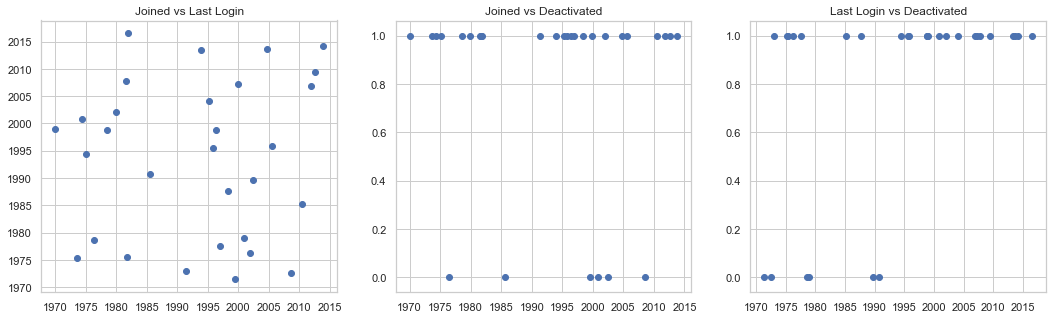

In [143]:
postgres_db = 'houseprices'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

customers_df = pd.read_sql_query('select * from customers',con = engine2)

engine2.dispose()

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(customers_df["joined_at"], customers_df["last_login_at"])
plt.title("Joined vs Last Login")

plt.subplot(1,3,2)
plt.scatter(customers_df["joined_at"], customers_df["is_deactivated"])
plt.title("Joined vs Deactivated")

plt.subplot(1,3,3)
plt.scatter(customers_df["last_login_at"], customers_df["is_deactivated"])
plt.title("Last Login vs Deactivated")

plt.show()

In [144]:
house_prices_df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,winsorized_lot_area,winsorized_lot_frontage
id,1.000,0.011,-0.010,-0.033,-0.028,0.013,-0.013,-0.022,-0.050,-0.005,...,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022,-0.011,-0.025
mssubclass,0.011,1.000,-0.357,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,...,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084,-0.435,-0.447
lotfrontage,-0.010,-0.357,1.000,0.307,0.234,-0.053,0.118,0.083,0.180,0.216,...,0.010,0.062,0.038,0.181,0.001,0.010,0.007,0.335,0.573,0.870
lotarea,-0.033,-0.140,0.307,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,...,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264,0.490,0.248
overallqual,-0.028,0.033,0.234,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,...,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791,0.233,0.227
overallcond,0.013,-0.059,-0.053,-0.006,-0.092,1.000,-0.376,0.074,-0.128,-0.046,...,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078,-0.022,-0.042
yearbuilt,-0.013,0.028,0.118,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,...,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523,0.080,0.129
yearremodadd,-0.022,0.041,0.083,0.014,0.551,0.074,0.593,1.000,0.180,0.128,...,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507,0.064,0.068
masvnrarea,-0.050,0.023,0.180,0.104,0.412,-0.128,0.316,0.180,1.000,0.265,...,-0.110,0.019,0.061,0.012,-0.030,-0.006,-0.008,0.477,0.165,0.183
bsmtfinsf1,-0.005,-0.070,0.216,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,...,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386,0.209,0.151


In [145]:
customers_df.corr()

,customer_id,is_deactivated
customer_id,1.000,-0.231
is_deactivated,-0.231,1.000


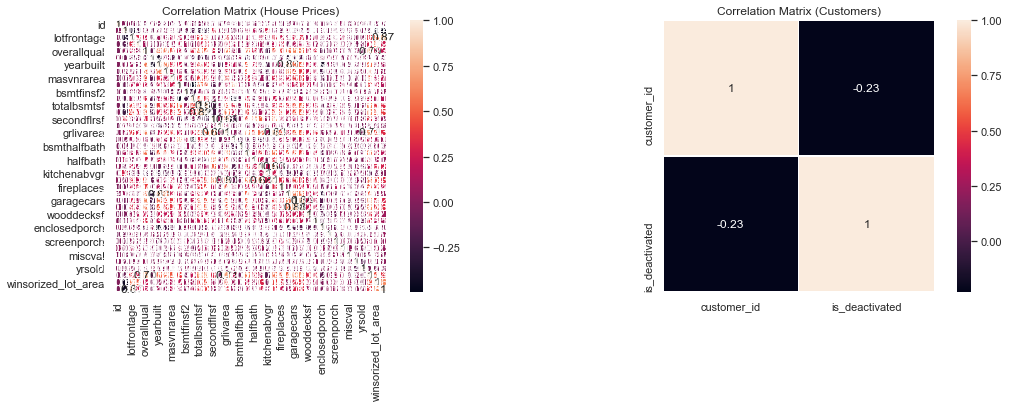

In [146]:
corrmat_house_prices = house_prices_df.corr()

corrmat_customers = customers_df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(corrmat_house_prices, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix (House Prices)")

plt.subplot(1,2,2)
sns.heatmap(corrmat_customers, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix (Customers)")

plt.show()

In [147]:
house_prices_df.groupby("mssubclass").mean()

,id,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,winsorized_lot_area,winsorized_lot_frontage
mssubclass,,,,,,,,,,,,,,,,,,,,,
20,723.998,76.095,11755.510,6.034,5.550,1977.961,1985.879,104.355,562.987,71.959,...,12.345,5.246,15.632,1.209,53.515,6.244,2007.875,185224.812,10368.683,73.533
30,747.826,61.193,7888.493,4.507,5.754,1926.638,1968.870,12.130,187.826,17.333,...,61.116,0.000,4.145,0.000,35.942,5.899,2007.768,95829.725,7677.058,59.816
40,725.000,55.012,12559.750,5.750,6.500,1946.000,1973.250,0.000,500.750,0.000,...,45.750,0.000,0.000,0.000,150.000,7.750,2008.500,156125.000,10254.750,55.012
45,422.000,55.000,6949.000,5.500,6.167,1934.583,1964.000,0.000,103.000,0.000,...,82.417,0.000,0.000,0.000,0.000,6.333,2007.417,108591.667,6949.000,55.000
50,751.194,64.672,10479.146,5.403,6.014,1935.833,1969.854,34.410,226.667,33.347,...,50.319,4.194,21.674,0.000,59.375,6.236,2007.840,143302.972,9058.083,63.325
60,708.883,78.517,12058.077,7.060,5.298,1994.495,1996.331,181.149,440.525,27.880,...,8.756,3.395,16.933,5.197,18.328,6.478,2007.729,239948.502,10899.622,75.122
70,771.467,66.021,10120.167,6.117,6.633,1918.833,1977.867,3.733,182.000,6.000,...,76.833,0.000,15.650,0.000,41.667,6.950,2007.817,166772.417,9595.983,64.137
75,604.875,77.066,11631.750,6.625,6.250,1912.625,1976.750,0.000,188.125,11.500,...,107.312,0.000,33.500,32.000,0.000,6.375,2007.500,192437.500,10061.875,71.316
80,792.155,76.586,10895.482,5.966,5.897,1974.276,1982.155,128.603,486.069,85.810,...,17.397,3.897,16.966,22.655,20.690,6.810,2007.810,169736.552,10505.966,75.052


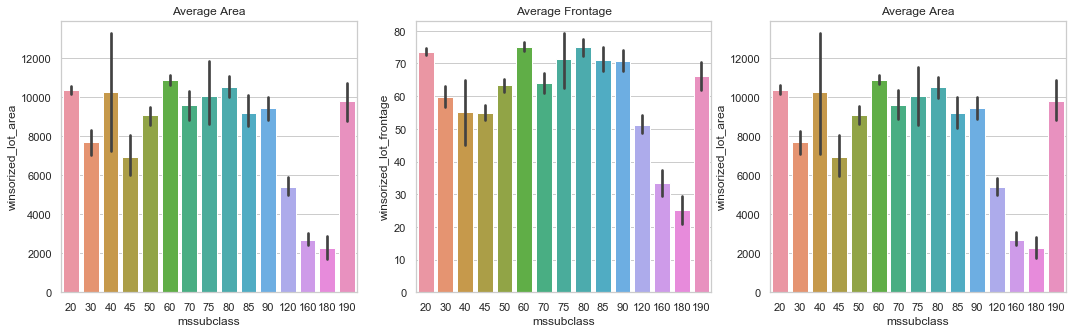

In [148]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(house_prices_df["mssubclass"], house_prices_df["winsorized_lot_area"])
plt.title("Average Area")

plt.subplot(1,3,2)
sns.barplot(house_prices_df["mssubclass"], house_prices_df["winsorized_lot_frontage"])
plt.title("Average Frontage")

plt.subplot(1,3,3)
sns.barplot(house_prices_df["mssubclass"], house_prices_df["winsorized_lot_area"])
plt.title("Average Area")

plt.show()

In [149]:
subclasses = house_prices_df["mssubclass"].unique()
grouped_df = house_prices_df.groupby("mssubclass")
for var in ["winsorized_lot_area", "winsorized_mszoning", "winsorized_lot_frontage"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(subclasses)):
        for j in range(i+1, len(subclasses)):
            print("t-test between groups {0} and {1}:".format(subclasses[i], subclasses[j]))
            print(stats.ttest_ind(
                house_prices_df[house_prices_df["mssubclass"]==subclasses[i]][var], 
                house_prices_df[house_prices_df["mszoning"]==subclasses[j]][var]
            ))

------------------------------------------------
Comparisons for variable: winsorized_lot_area
------------------------------------------------
t-test between groups 60 and 20:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 70:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 50:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 190:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 45:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 90:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 120:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 30:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 85:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 80:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 160:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between gr

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 70:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 50:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 190:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 45:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 90:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 120:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 30:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 85:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 80:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 160:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 75:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 180:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 40:
Ttest_in

Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 85:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 80:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 160:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 75:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 180:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 60 and 40:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 70:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 50:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 190:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 45:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 90:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 120:
Ttest_indResult(statistic=nan, pvalue=nan)
t-test between groups 20 and 30:
Ttest_in

In [150]:
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,winsorized_lot_area,winsorized_mszoning,winsorized_lot_frontage
0,1,60,RL,65.000,8450.000,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,208500,8450.000,RL,65.000
1,2,20,RL,80.000,9600.000,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,181500,9600.000,RL,80.000
2,3,60,RL,68.000,11250.000,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,223500,11250.000,RL,68.000
3,4,70,RL,60.000,9550.000,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,140000,9550.000,RL,60.000
4,5,60,RL,84.000,14260.000,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,250000,14260.000,RL,84.000


In [151]:
count_table = pd.crosstab(house_prices_df["lotarea"], house_prices_df["lotfrontage"])
count_table

lotfrontage,21.0,24.0,30.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,...,144.0,149.0,150.0,152.0,153.0,160.0,168.0,174.0,182.0,313.0
lotarea,,,,,,,,,,,,,,,,,,,,,
1300.000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477.000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491.000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1526.000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533.000,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596.000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1680.000,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1869.000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890.000,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


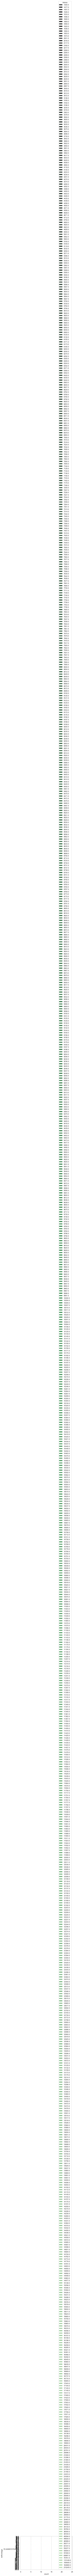

In [152]:
sns.countplot(y="lotfrontage", hue="lotarea", data=house_prices_df, palette="Greens_d")
plt.show()

In [153]:
print(stats.chisquare(count_table, axis=None))

Power_divergenceResult(statistic=275576.8410958903, pvalue=0.0)


In [154]:
# Feature Engineering (Module 20.7 used for reference)

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotfrontage"] = pd.to_numeric(house_prices_df["lotfrontage"], downcast="float")

house_prices_df.lotshape = house_prices_df.lotshape.apply(str.strip).replace("", np.nan)


house_prices_df["lotarea"].fillna(house_prices_df["lotarea"].mean(), inplace=True)
house_prices_df["lotfrontage"].fillna(house_prices_df["lotfrontage"].mean(), inplace=True)

house_prices_df["winsorized_lot_area"] = winsorized_views = winsorize(house_prices_df["lotarea"], (0, 0.10))
house_prices_df["winsorized_overall_qual"] = winsorized_views = winsorize(house_prices_df["overallqual"], (0, 0.10))
house_prices_df["winsorized_lot_frontage"] = winsorized_views = winsorize(house_prices_df["lotfrontage"], (0, 0.10))

for i in range(0, len(house_prices_df.mssubclass)):
    if pd.isnull(house_prices_df.mssubclass[i]):
        house_prices_df.mssubclass[i] = house_prices_df.mssubclass[i-1]
        
pd.get_dummies(house_prices_df["mssubclass"])

,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [156]:
house_prices_df = pd.concat([house_prices_df, pd.get_dummies(house_prices_df["mssubclass"])], axis=1)
house_prices_df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,60,70,75,80,85,90,120,160,180,190
0,1,60,RL,65.000,8450.000,Pave,None,Reg,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000,9600.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.000,11250.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000,9550.000,Pave,None,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
4,5,60,RL,84.000,14260.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
5,6,50,RL,85.000,14115.000,Pave,None,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,75.000,10084.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
7,8,60,RL,70.050,10382.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
8,9,50,RM,51.000,6120.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
9,10,190,RL,50.000,7420.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1


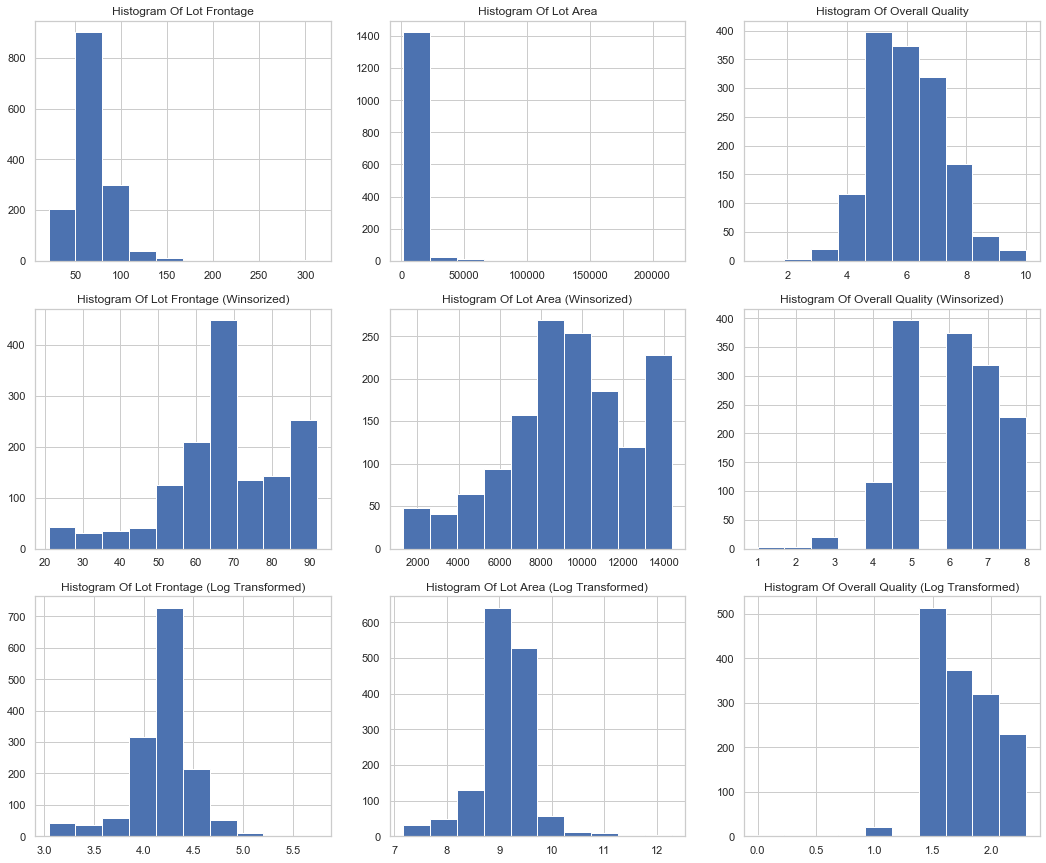

In [157]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(house_prices_df["lotfrontage"])
plt.title("Histogram Of Lot Frontage")

plt.subplot(3, 3, 2)
plt.hist(house_prices_df["lotarea"])
plt.title("Histogram Of Lot Area")

plt.subplot(3, 3, 3)
plt.hist(house_prices_df["overallqual"])
plt.title("Histogram Of Overall Quality")

plt.subplot(3, 3, 4)
plt.hist(house_prices_df["winsorized_lot_frontage"])
plt.title("Histogram Of Lot Frontage (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(house_prices_df["winsorized_lot_area"])
plt.title("Histogram Of Lot Area (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(house_prices_df["winsorized_overall_qual"])
plt.title("Histogram Of Overall Quality (Winsorized)")

plt.subplot(3, 3, 7)
plt.hist(np.log(house_prices_df["lotfrontage"]))
plt.title("Histogram Of Lot Frontage (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(house_prices_df["lotarea"]))
plt.title("Histogram Of Lot Area (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(house_prices_df["overallqual"]))
plt.title("Histogram Of Overall Quality (Log Transformed)")

plt.show()

In [158]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(house_prices_df["lotfrontage"]))
norm_stats = normaltest(np.log(house_prices_df["lotfrontage"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(house_prices_df["lotarea"]))
norm_stats = normaltest(np.log(house_prices_df["lotarea"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(house_prices_df["lotarea"]))
norm_stats = normaltest(np.log(house_prices_df["lotarea"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 973.777759035805 and p value is 0.0
Normality test statistics is 282.6490329090848 and p value is 4.2028350567767205e-62
Jarque-Bera test statistics is 1344.5039232481995 and p value is 0.0
Normality test statistics is 164.29790074965686 and p value is 2.1045737929108097e-36
Jarque-Bera test statistics is 1344.5039232481995 and p value is 0.0
Normality test statistics is 164.29790074965686 and p value is 2.1045737929108097e-36


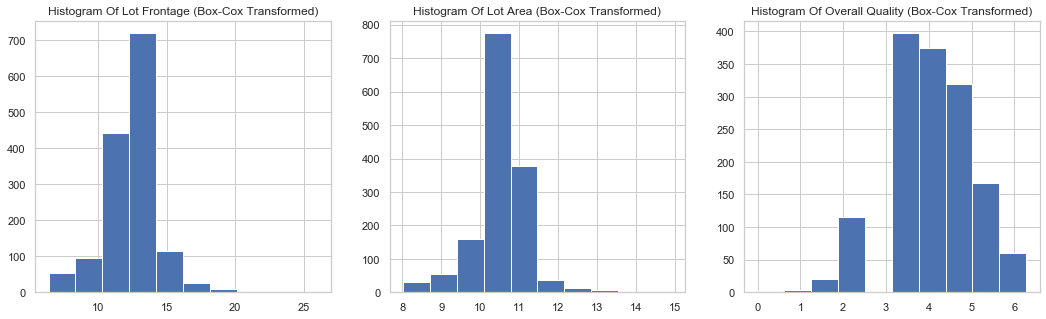

In [160]:
from scipy.stats import boxcox

lot_area_boxcox,_ = boxcox(house_prices_df["lotarea"])
lot_frontage_boxcox,_ = boxcox(house_prices_df["lotfrontage"])
overall_qual_boxcox,_ = boxcox(house_prices_df["overallqual"])

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(lot_frontage_boxcox)
plt.title("Histogram Of Lot Frontage (Box-Cox Transformed)")

plt.subplot(1, 3, 2)
plt.hist(lot_area_boxcox)
plt.title("Histogram Of Lot Area (Box-Cox Transformed)")

plt.subplot(1, 3, 3)
plt.hist(overall_qual_boxcox)
plt.title("Histogram Of Overall Quality (Box-Cox Transformed)")

plt.show()

In [161]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(lot_frontage_boxcox)
norm_stats = normaltest(lot_frontage_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(lot_area_boxcox)
norm_stats = normaltest(lot_area_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(lot_area_boxcox)
norm_stats = normaltest(lot_area_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1466.0808218226698 and p value is 0.0
Normality test statistics is 173.01000559432381 and p value is 2.6999432023215716e-38
Jarque-Bera test statistics is 1590.384111002777 and p value is 0.0
Normality test statistics is 170.8585347359821 and p value is 7.916634398162818e-38
Jarque-Bera test statistics is 1590.384111002777 and p value is 0.0
Normality test statistics is 170.8585347359821 and p value is 7.916634398162818e-38


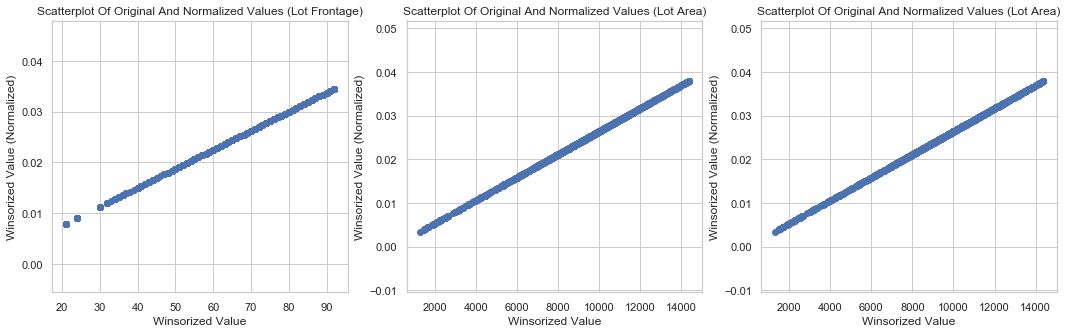

In [162]:
from sklearn.preprocessing import normalize

house_prices_df["norm_winsorized_lot_frontage"] = normalize(np.array(house_prices_df["winsorized_lot_frontage"]).reshape(1,-1)).reshape(-1,1)
house_prices_df["norm_winsorized_lot_area"] = normalize(np.array(house_prices_df["winsorized_lot_area"]).reshape(1,-1)).reshape(-1,1)
house_prices_df["norm_winsorized_lot_area"] = normalize(np.array(house_prices_df["winsorized_lot_area"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house_prices_df["winsorized_lot_frontage"], house_prices_df["norm_winsorized_lot_frontage"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Frontage)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,2)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["norm_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,3)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["norm_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.show()

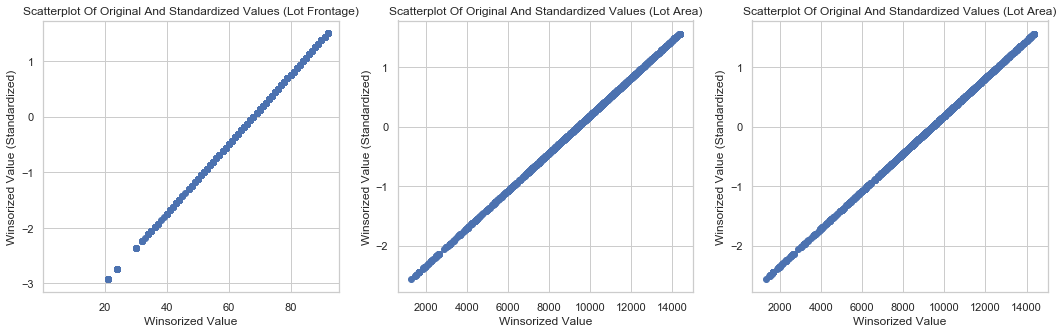

In [163]:
from sklearn.preprocessing import scale

house_prices_df["scaled_winsorized_lot_frontage"] = scale(house_prices_df["winsorized_lot_frontage"])
house_prices_df["scaled_winsorized_lot_area"] = scale(house_prices_df["winsorized_lot_area"])
house_prices_df["scaled_winsorized_lot_area"] = scale(house_prices_df["winsorized_lot_area"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house_prices_df["winsorized_lot_frontage"], house_prices_df["scaled_winsorized_lot_frontage"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Frontage)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["scaled_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.subplot(1,3,3)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["scaled_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.show()

# 3) Now, split your data into train and test sets where 20% of the data resides in the test set.

In [164]:
# Step 3

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [166]:
np.random.seed(456)

X = pd.DataFrame(25 - np.arange(1,51)) 

Y = X + X**2 +  pd.DataFrame(np.random.normal(0,100,50))

lrm_underfit = LinearRegression().fit(X, Y)
preds_underfit = lrm_underfit.predict(X)

X_correct = pd.concat([X, X**2], axis=1)
lrm_correct = LinearRegression().fit(X_correct, Y)
preds_correct = lrm_correct.predict(X_correct)

X_overfit = pd.concat([X**i for i in range(1,11)], axis=1)
lrm_overfit = LinearRegression().fit(X_overfit, Y)
preds_overfit = lrm_overfit.predict(X_overfit)

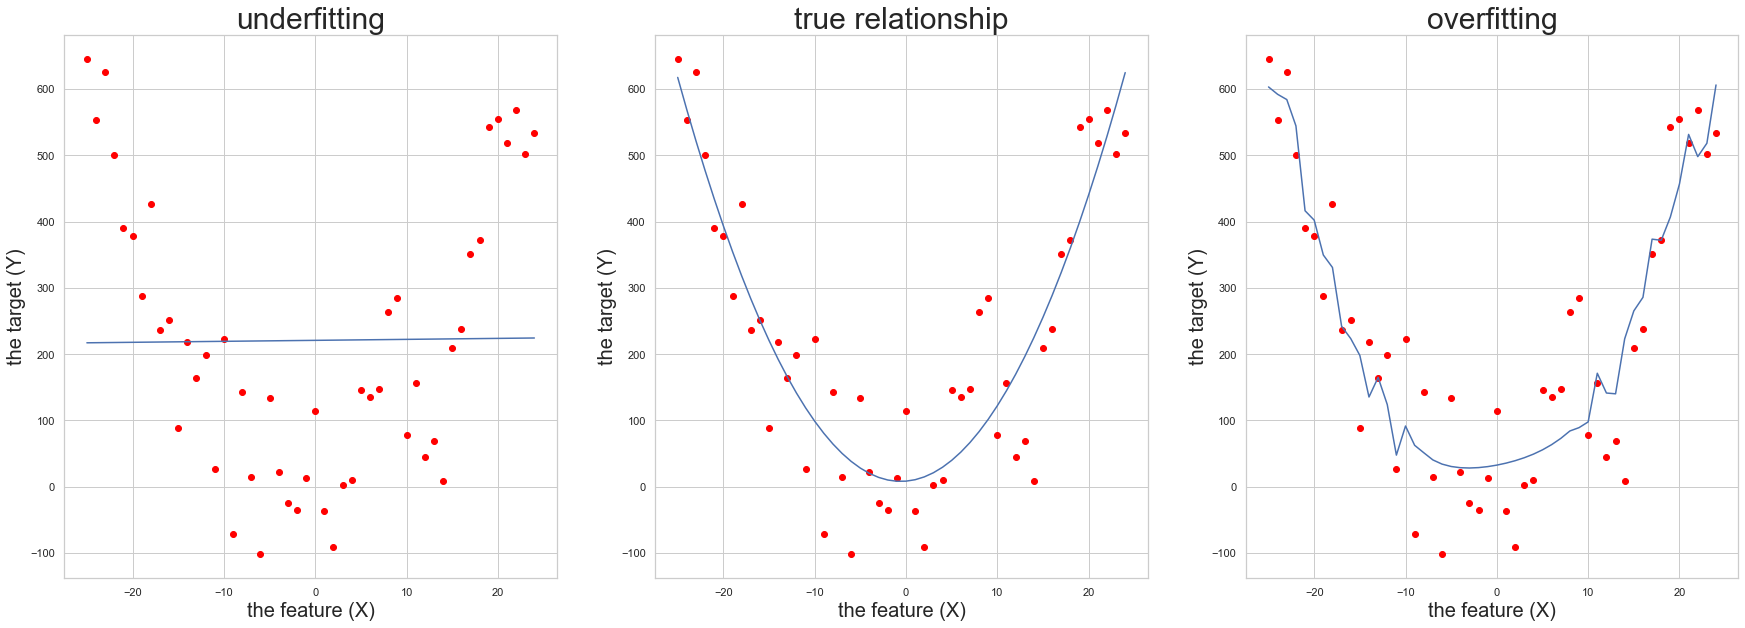

In [167]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_underfit)
plt.title("underfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,2)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_correct)
plt.title("true relationship", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,3)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_overfit)
plt.title("overfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.show()

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

# Y is the target variable
Y = houseprices_df['saleprice']

numerical_cols = [col_name for col_name in houseprices_df.dtypes[houseprices_df.dtypes.values == 'int64'].index 
                    if col_name not in ["id", "saleprice"] ]

X = houseprices_df[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

# X is the feature set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The number of observations in training set is 1168
The number of observations in test set is 292
R-squared of the model in the training set is: 0.9519952491505658
-----Test set statistics-----
R-squared of the model in the test set is: -2.3665709958454984e+21
Mean absolute error of the prediction is: 413261382670431.8
Mean squared error of the prediction is: 1.5888457348224765e+31
Root mean squared error of the prediction is: 3986032783134725.5
Mean absolute percentage error of the prediction is: 157673009058.75677


In [169]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.6771899948741743
-----Test set statistics-----
R-squared of the model on the test set is: 0.2935580796291911
Mean absolute error of the prediction is: 48573.037184503846
Mean squared error of the prediction is: 4742842002.421959
Root mean squared error of the prediction is: 68868.29460950778
Mean absolute percentage error of the prediction is: 28.881794589593778


In [170]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.7531246860983718
-----Test set statistics-----
R-squared of the model on the test set is: 0.5534700128241107
Mean absolute error of the prediction is: 37169.49709729894
Mean squared error of the prediction is: 2997870196.3313694
Root mean squared error of the prediction is: 54752.8099400512
Mean absolute percentage error of the prediction is: 22.397383107400547


# 4) Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [172]:
np.random.seed(456)

X = pd.DataFrame(25 - np.arange(1,51)) 

Y = X + X**2 +  pd.DataFrame(np.random.normal(0,100,50))

lrm_underfit = LinearRegression().fit(X, Y)
preds_underfit = lrm_underfit.predict(X)

X_correct = pd.concat([X, X**2], axis=1)
lrm_correct = LinearRegression().fit(X_correct, Y)
preds_correct = lrm_correct.predict(X_correct)

X_overfit = pd.concat([X**i for i in range(1,11)], axis=1)
lrm_overfit = LinearRegression().fit(X_overfit, Y)
preds_overfit = lrm_overfit.predict(X_overfit)

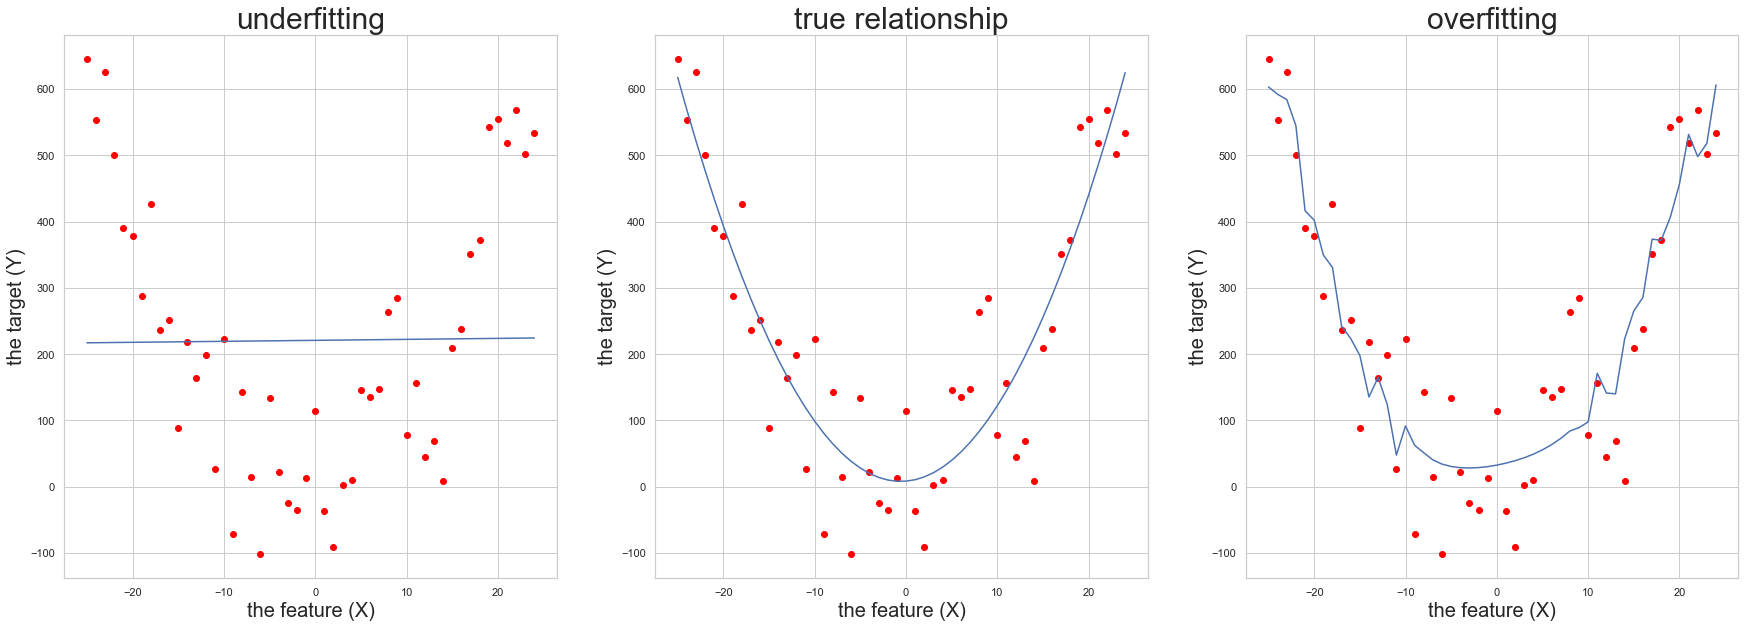

In [173]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_underfit)
plt.title("underfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,2)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_correct)
plt.title("true relationship", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.subplot(1,3,3)
plt.scatter(X, Y, color="red")
plt.plot(X, preds_overfit)
plt.title("overfitting", fontsize=30)
plt.xlabel("the feature (X)", fontsize=20)
plt.ylabel("the target (Y)", fontsize=20)

plt.show()

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

Y = house_prices_df['saleprice']

numerical_cols = [col_name for col_name in house_prices_df.dtypes[house_prices_df.dtypes.values == 'int64'].index 
                    if col_name not in ["id", "saleprice"] ]

X = house_prices_df[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The number of observations in training set is 1168
The number of observations in test set is 292
R-squared of the model in the training set is: 0.9519952491505658
-----Test set statistics-----
R-squared of the model in the test set is: -2.3665709958454984e+21
Mean absolute error of the prediction is: 413261382670431.8
Mean squared error of the prediction is: 1.5888457348224765e+31
Root mean squared error of the prediction is: 3986032783134725.5
Mean absolute percentage error of the prediction is: 157673009058.75677


In [175]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.6771899948741743
-----Test set statistics-----
R-squared of the model on the test set is: 0.2935580796291911
Mean absolute error of the prediction is: 48573.037184503846
Mean squared error of the prediction is: 4742842002.421959
Root mean squared error of the prediction is: 68868.29460950778
Mean absolute percentage error of the prediction is: 28.881794589593778


In [176]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.7531246860983718
-----Test set statistics-----
R-squared of the model on the test set is: 0.5534700128241107
Mean absolute error of the prediction is: 37169.49709729894
Mean squared error of the prediction is: 2997870196.3313694
Root mean squared error of the prediction is: 54752.8099400512
Mean absolute percentage error of the prediction is: 22.397383107400547


In [177]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.6918969569351591
-----Test set statistics-----
R-squared of the model on the test set is: 0.4110329457567222
Mean absolute error of the prediction is: 41599.586930190126
Mean squared error of the prediction is: 3954150514.5129495
Root mean squared error of the prediction is: 62882.03650099883
Mean absolute percentage error of the prediction is: 23.62573760482617


# 5) Evaluate your best model on the test set.

# 6) So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, 
        postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices', con = engine)

engine.dispose()

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotarea"] = pd.to_numeric(house_prices_df["lotarea"], downcast="float")

house_prices_df["mszoning"] = house_prices_df["mszoning"].apply(str.strip).replace("--", np.nan)
house_prices_df["lotfrontage"] = pd.to_numeric(house_prices_df["lotfrontage"], downcast="float")

house_prices_df.lotshape = house_prices_df.lotshape.apply(str.strip).replace("", np.nan)


house_prices_df["lotarea"].fillna(house_prices_df["lotarea"].mean(), inplace=True)
house_prices_df["lotfrontage"].fillna(house_prices_df["lotfrontage"].mean(), inplace=True)

house_prices_df["winsorized_lot_area"] = winsorized_views = winsorize(house_prices_df["lotarea"], (0, 0.10))
house_prices_df["winsorized_mszoning"] = winsorized_views = winsorize(house_prices_df["mszoning"], (0, 0.10))
house_prices_df["winsorized_lot_frontage"] = winsorized_views = winsorize(house_prices_df["lotfrontage"], (0, 0.10))

for i in range(0, len(house_prices_df.mssubclass)):
    if pd.isnull(house_prices_df.mssubclass[i]):
        house_prices_df.mssubclass[i] = house_prices_df.mssubclass[i-1]
        
pd.get_dummies(house_prices_df["mssubclass"])

,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [179]:
house_prices_df = pd.concat([house_prices_df, pd.get_dummies(house_prices_df["mssubclass"])], axis=1)
house_prices_df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,60,70,75,80,85,90,120,160,180,190
0,1,60,RL,65.000,8450.000,Pave,None,Reg,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000,9600.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.000,11250.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000,9550.000,Pave,None,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
4,5,60,RL,84.000,14260.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
5,6,50,RL,85.000,14115.000,Pave,None,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,75.000,10084.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
7,8,60,RL,70.050,10382.000,Pave,None,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
8,9,50,RM,51.000,6120.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
9,10,190,RL,50.000,7420.000,Pave,None,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1


In [180]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(house_prices_df["lotfrontage"]))
norm_stats = normaltest(np.log(house_prices_df["lotfrontage"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(house_prices_df["lotarea"]))
norm_stats = normaltest(np.log(house_prices_df["lotarea"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(house_prices_df["lotarea"]))
norm_stats = normaltest(np.log(house_prices_df["lotarea"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 973.777759035805 and p value is 0.0
Normality test statistics is 282.6490329090848 and p value is 4.2028350567767205e-62
Jarque-Bera test statistics is 1344.5039232481995 and p value is 0.0
Normality test statistics is 164.29790074965686 and p value is 2.1045737929108097e-36
Jarque-Bera test statistics is 1344.5039232481995 and p value is 0.0
Normality test statistics is 164.29790074965686 and p value is 2.1045737929108097e-36


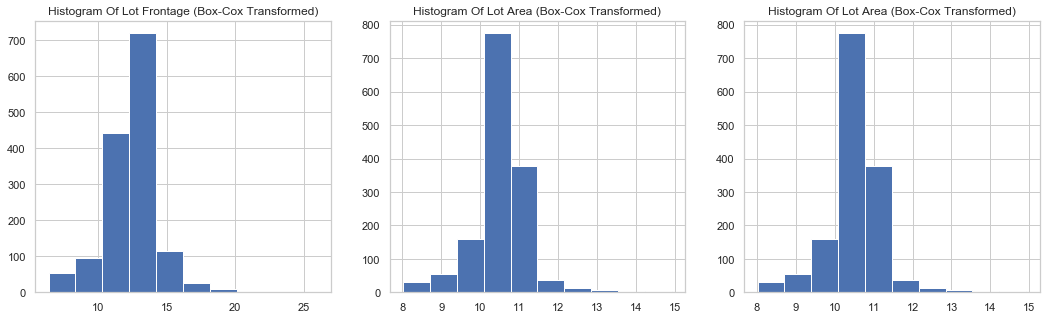

In [181]:
from scipy.stats import boxcox

lot_area_boxcox,_ = boxcox(house_prices_df["lotarea"])
lot_frontage_boxcox,_ = boxcox(house_prices_df["lotfrontage"])
lot_area_boxcox,_ = boxcox(house_prices_df["lotarea"])

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(lot_frontage_boxcox)
plt.title("Histogram Of Lot Frontage (Box-Cox Transformed)")

plt.subplot(1, 3, 2)
plt.hist(lot_area_boxcox)
plt.title("Histogram Of Lot Area (Box-Cox Transformed)")

plt.subplot(1, 3, 3)
plt.hist(lot_area_boxcox)
plt.title("Histogram Of Lot Area (Box-Cox Transformed)")

plt.show()

In [182]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(lot_frontage_boxcox)
norm_stats = normaltest(lot_frontage_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(lot_area_boxcox)
norm_stats = normaltest(lot_area_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(lot_area_boxcox)
norm_stats = normaltest(lot_area_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1466.0808218226698 and p value is 0.0
Normality test statistics is 173.01000559432381 and p value is 2.6999432023215716e-38
Jarque-Bera test statistics is 1590.384111002777 and p value is 0.0
Normality test statistics is 170.8585347359821 and p value is 7.916634398162818e-38
Jarque-Bera test statistics is 1590.384111002777 and p value is 0.0
Normality test statistics is 170.8585347359821 and p value is 7.916634398162818e-38


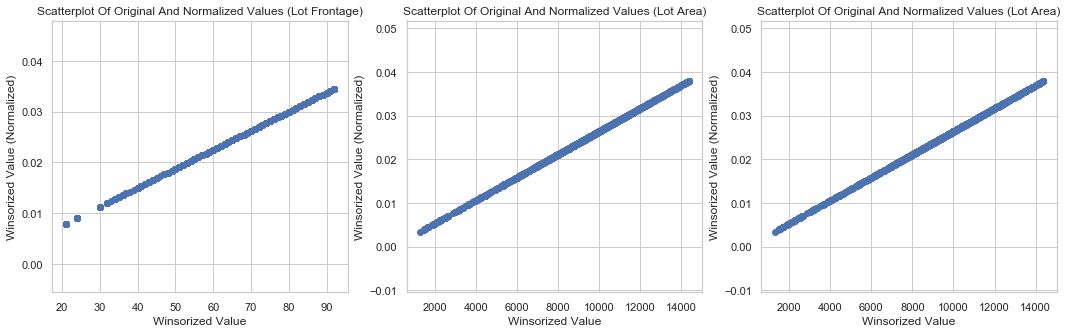

In [183]:
from sklearn.preprocessing import normalize

house_prices_df["norm_winsorized_lot_frontage"] = normalize(np.array(house_prices_df["winsorized_lot_frontage"]).reshape(1,-1)).reshape(-1,1)
house_prices_df["norm_winsorized_lot_area"] = normalize(np.array(house_prices_df["winsorized_lot_area"]).reshape(1,-1)).reshape(-1,1)
house_prices_df["norm_winsorized_lot_area"] = normalize(np.array(house_prices_df["winsorized_lot_area"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house_prices_df["winsorized_lot_frontage"], house_prices_df["norm_winsorized_lot_frontage"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Frontage)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,2)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["norm_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,3)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["norm_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Normalized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.show()

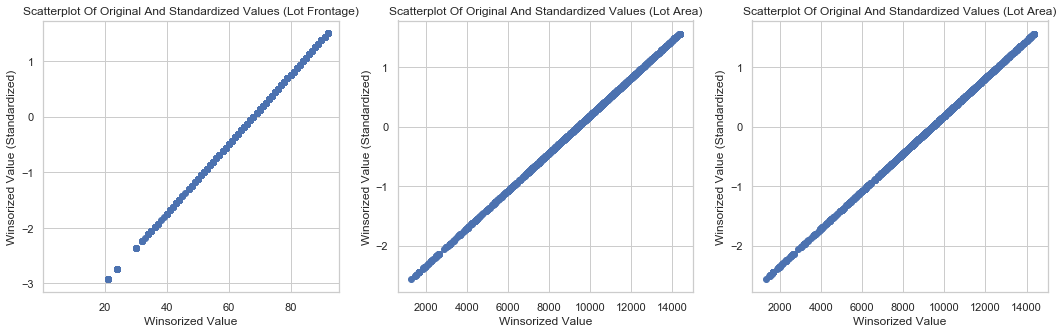

In [184]:
from sklearn.preprocessing import scale

house_prices_df["scaled_winsorized_lot_frontage"] = scale(house_prices_df["winsorized_lot_frontage"])
house_prices_df["scaled_winsorized_lot_area"] = scale(house_prices_df["winsorized_lot_area"])
house_prices_df["scaled_winsorized_lot_area"] = scale(house_prices_df["winsorized_lot_area"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(house_prices_df["winsorized_lot_frontage"], house_prices_df["scaled_winsorized_lot_frontage"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Frontage)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["scaled_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.subplot(1,3,3)
plt.scatter(house_prices_df["winsorized_lot_area"], house_prices_df["scaled_winsorized_lot_area"])
plt.title("Scatterplot Of Original And Standardized Values (Lot Area)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.show()